### Análise preliminar das tabelas

In [517]:
import json
import mysql.connector
import pandas as pd

In [518]:
with open('credentials.json', 'r') as file:
    config = json.load(file)

In [519]:
# Função para executar consultas de forma segura
def execute_query(query: str):
    connection = mysql.connector.connect(
        host=config['host'],
        user=config['user'],
        password=config['password'],
        database=config['database'],
        port=config['port']
    )

    cursor = connection.cursor()
    cursor.execute(query)

    rows = cursor.fetchall() 
    cols = [desc[0] for desc in cursor.description]
    df = pd.DataFrame(rows, columns=cols)

    cursor.close()
    connection.close()

    return df

In [520]:
# Analisando tabelas disponíveis
execute_query("SHOW TABLES")

,Tables_in_case_data_scientist
0,daumau
1,desinstalacoes
2,installs
3,ratings_reviews


In [521]:
execute_query("SELECT * FROM daumau limit 100")

,appId,date,dauReal,mauReal
0,com.app.33540,2024-01-01,393961.0,3643110.0
1,com.app.33540,2024-01-02,800448.0,3643040.0
2,com.app.31679,2024-01-01,157532.0,1349262.0
3,com.app.31679,2024-01-02,313847.0,1349317.0
4,com.app.77385,2024-01-01,239768.0,1934660.0
...,...,...,...,...
95,com.app.44541,2024-01-02,1780.0,36478.0
96,com.app.84714,2024-01-01,124602.0,966721.0
97,com.app.84714,2024-01-02,142720.0,970677.0
98,com.app.37873,2024-01-01,24350.0,266649.0


In [522]:
execute_query("SELECT * FROM desinstalacoes limit 100")

,appId,date,country,lang,predictionLoss
0,com.app.71740,2024-01-01,br,pt,1463
1,com.app.33540,2024-01-01,br,pt,8170
2,com.app.19544,2024-01-01,br,pt,77048
3,com.app.77385,2024-01-01,br,pt,4497
4,com.app.31679,2024-01-01,br,pt,4287
...,...,...,...,...,...
95,com.app.87362,2024-01-01,br,pt,26471
96,com.app.47938,2024-01-01,br,pt,1903
97,com.app.45088,2024-01-01,br,pt,72342
98,com.app.60770,2024-01-01,br,pt,1785


In [523]:
execute_query("SELECT * FROM installs limit 100")

,appid,date,newinstalls
0,com.app.86367,2024-01-01,1968
1,com.app.18711,2024-01-01,1364
2,com.app.36257,2024-01-01,7511
3,com.app.88509,2024-01-01,53137
4,com.app.93131,2024-01-01,137
...,...,...,...
95,com.app.91706,2024-01-01,374
96,com.app.92210,2024-01-01,550
97,com.app.45088,2024-01-01,17979
98,com.app.31404,2024-01-01,145


In [524]:
execute_query("SELECT * FROM ratings_reviews limit 100")

,date,appid,category,ratings,daily_ratings,reviews,daily_reviews
0,2024-01-01,com.app.40009,OTHERS,63500.0,5.0,25251.0,0.0
1,2024-01-01,com.app.88516,OTHERS,2440.0,0.0,312.0,0.0
2,2024-01-01,com.app.64634,TRAVEL_AND_LOCAL,536.0,0.0,331.0,0.0
3,2024-01-01,com.app.78470,SHOPPING,97924.0,7.0,27241.0,23.0
4,2024-01-01,com.app.36433,FINANCE,678.0,0.0,414.0,0.0
...,...,...,...,...,...,...,...
95,2024-01-01,com.app.78794,FINANCE,2113445.0,78.0,954725.0,25.0
96,2024-01-01,com.app.24391,OTHERS,1090.0,11.0,713.0,3.0
97,2024-01-01,com.app.20103,FINANCE,1515.0,0.0,1125.0,1.0
98,2024-01-01,com.app.31097,TRAVEL_AND_LOCAL,8452.0,8.0,3153.0,5.0


### Verificando duplicados

In [525]:
daumau_df = execute_query("SELECT * FROM daumau")

In [526]:
# avaliando se existem datas de um determinado app com mais de um registro
daumau_df.groupby(['appId', 'date']).agg(count=('dauReal', 'size')).reset_index().sort_values(by='count', ascending=False)

,appId,date,count
15089,com.app.44541,2024-01-13,2
11200,com.app.36612,2024-01-13,2
9346,com.app.33540,2024-01-12,2
1020,com.app.14811,2024-01-12,2
11201,com.app.36612,2024-01-14,2
...,...,...,...
41113,com.app.99432,2024-09-27,1
41114,com.app.99432,2024-09-28,1
41115,com.app.99432,2024-09-29,1
41116,com.app.99432,2024-09-30,1


In [527]:
daumau_df[(daumau_df["appId"]=="com.app.44541") & (daumau_df["date"].astype(str)=="2024-01-13")]

# indicio de que não existem valores diferentes para um mesmo dia e app, apenas valores duplicados mesmo

,appId,date,dauReal,mauReal
1702,com.app.44541,2024-01-13,1670.0,34385.0
41196,com.app.44541,2024-01-13,1670.0,34385.0


### Deduplicando

In [528]:
daumau_df = daumau_df.drop_duplicates()

In [529]:
daumau_df.groupby(['appId', 'date']).agg(count=('dauReal', 'size')).reset_index().sort_values(by='count', ascending=False)

,appId,date,count
0,com.app.10626,2024-03-23,1
1,com.app.10626,2024-03-24,1
2,com.app.10626,2024-03-25,1
3,com.app.10626,2024-03-26,1
4,com.app.10626,2024-03-27,1
...,...,...,...
41113,com.app.99432,2024-09-27,1
41114,com.app.99432,2024-09-28,1
41115,com.app.99432,2024-09-29,1
41116,com.app.99432,2024-09-30,1


### Avaliando nulos

In [530]:
daumau_df.isna().sum()

appId       28
date         0
dauReal    194
mauReal     20
dtype: int64

In [531]:
# como o volume é baixo, vou apenas dropar
daumau_df = daumau_df.dropna()

### Avaliando range de datas

In [532]:
import matplotlib.pyplot as plt
import seaborn as sns

In [533]:
daumau_df["date"] = pd.to_datetime(daumau_df["date"], errors="raise").dt.date

In [534]:
print(f"Data máxima: {daumau_df['date'].max()}")
print(f"Data mínima: {daumau_df['date'].min()}")

# problema com o range de datas

Data máxima: 2220-07-31
Data mínima: 1912-02-01


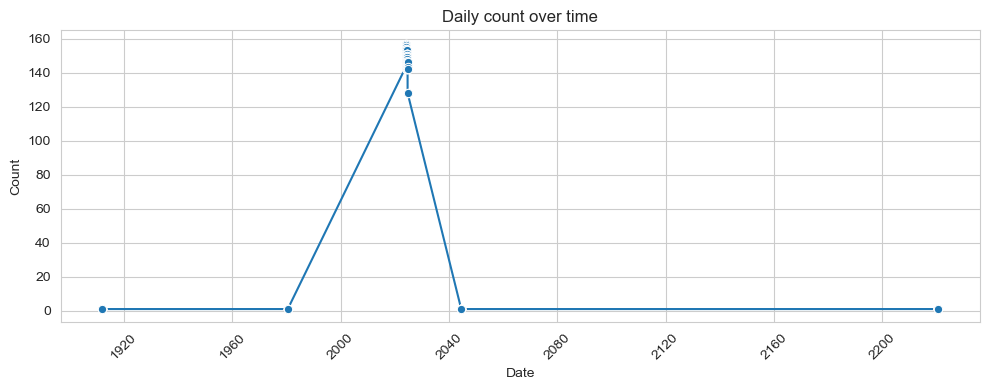

In [535]:
# gráfico gerado usando chatgpt
plt.figure(figsize=(10, 4))
ax = sns.lineplot(data=daumau_df.groupby("date").agg(count=("dauReal","count")).reset_index(), x="date", y="count", marker="o")
ax.set(
    title="Daily count over time",
    xlabel="Date",
    ylabel="Count"
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [536]:
from datetime import datetime

# filtrando datas menores do que hoje
daumau_df = daumau_df[daumau_df["date"] < datetime.now().date()]

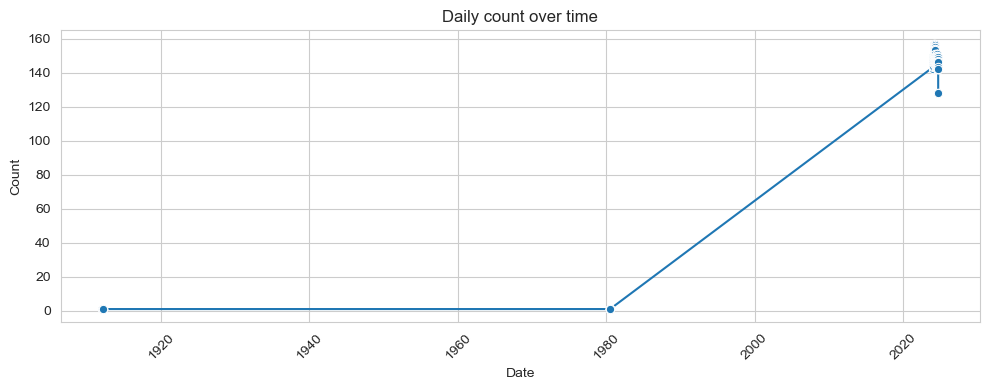

In [537]:
# gráfico gerado usando chatgpt
plt.figure(figsize=(10, 4))
ax = sns.lineplot(data=daumau_df.groupby("date").agg(count=("dauReal","count")).reset_index(), x="date", y="count", marker="o")
ax.set(
    title="Daily count over time",
    xlabel="Date",
    ylabel="Count"
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [538]:
# filtrando datas menores do que 2020
daumau_df = daumau_df[daumau_df["date"] > datetime(year=2020, month=1, day=1).date()]

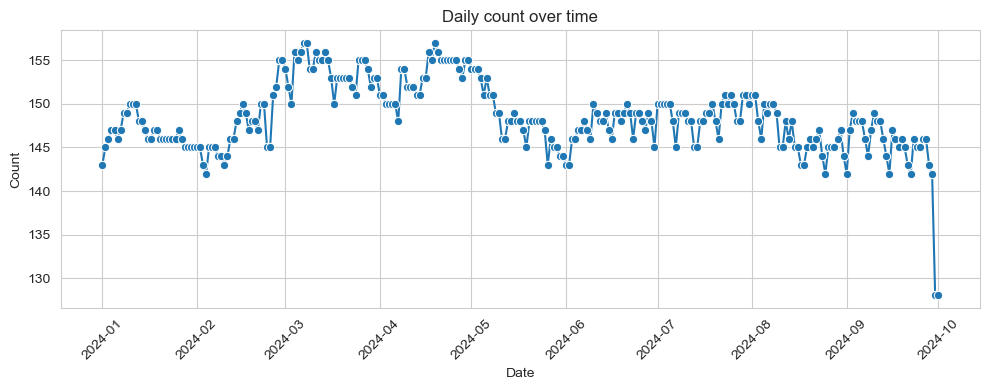

In [539]:
# gráfico gerado usando chatgpt
plt.figure(figsize=(10, 4))
ax = sns.lineplot(data=daumau_df.groupby("date").agg(count=("dauReal","count")).reset_index(), x="date", y="count", marker="o")
ax.set(
    title="Daily count over time",
    xlabel="Date",
    ylabel="Count"
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [540]:
print(f"Data máxima: {daumau_df['date'].max()}")
print(f"Data mínima: {daumau_df['date'].min()}")

Data máxima: 2024-10-01
Data mínima: 2024-01-01


In [541]:
# gráfico está coerente, porém tem algumas datas com pouca informação, vou filtrá-las

daumau_df = daumau_df[daumau_df["date"] < datetime(year=2024, month=9, day=30).date()]

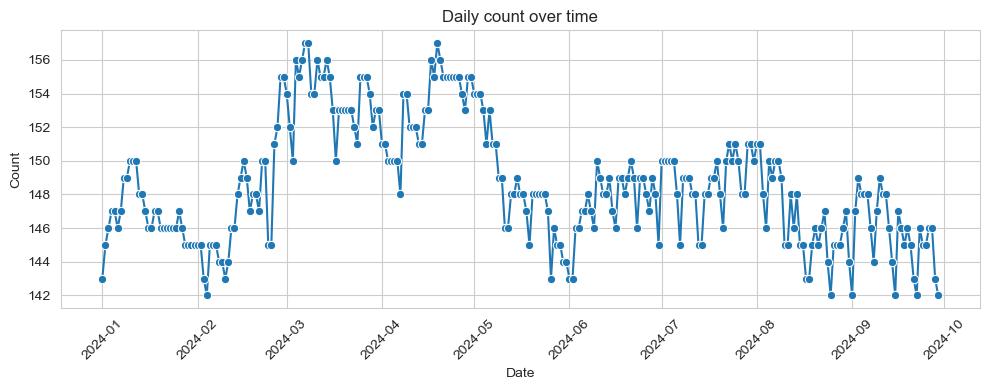

In [542]:
# gráfico gerado usando chatgpt
plt.figure(figsize=(10, 4))
ax = sns.lineplot(data=daumau_df.groupby("date").agg(count=("dauReal","count")).reset_index(), x="date", y="count", marker="o")
ax.set(
    title="Daily count over time",
    xlabel="Date",
    ylabel="Count"
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [543]:
print(f"Data máxima: {daumau_df['date'].max()}")
print(f"Data mínima: {daumau_df['date'].min()}")

Data máxima: 2024-09-29
Data mínima: 2024-01-01


### Valores Ausentes

In [544]:
import itertools


start = datetime(year=2024, month=1, day=1)
end   = datetime(year=2024, month=9, day=29)

# gerando dataframe com todas as datas
app_ids = daumau_df["appId"].unique()
dates   = pd.date_range(start=start, end=end, freq="D").date

all_dates_by_app_df = pd.DataFrame(
    itertools.product(app_ids, dates),
    columns=["appId", "date"]
)

daumau_df = all_dates_by_app_df.merge(daumau_df, how="left", on=["date", "appId"])

In [545]:
# quantidade considerável de missing
daumau_df.isnull().sum()

appId          0
date           0
dauReal    11841
mauReal    11841
dtype: int64

In [546]:
# analisando percentual de nulos e tamanho dos gaps
def longest_gap(x: pd.Series) -> int:
    mask = x.isna().astype(int)
    return (mask.groupby(mask.cumsum() * (mask == 0)).sum()).max()


stats_df = (
    daumau_df.assign(date=daumau_df["date"])
    .sort_values(["appId", "date"])
    .groupby("appId")["dauReal"]
    .agg(missing_rate=lambda s: s.isna().mean(), longest_gap=longest_gap, points=len)
)

stats_df.sort_values(by="longest_gap", ascending=False).head(20)

,missing_rate,longest_gap,points
appId,,,
com.app.36433,0.996337,272,273
com.app.96037,0.996337,272,273
com.app.28498,0.992674,271,273
com.app.91706,0.959707,262,273
com.app.97548,0.959707,262,273
com.app.34279,0.956044,261,273
com.app.35190,0.952381,260,273
com.app.67629,0.948718,259,273
com.app.66309,0.948718,259,273


<Axes: xlabel='month', ylabel='dauReal'>

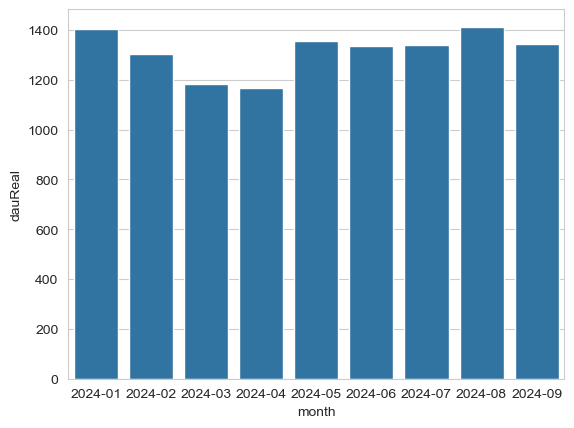

In [547]:
daumau_df['month'] = pd.to_datetime(daumau_df['date']).dt.to_period('M')

monthly_nulls = (
    daumau_df['dauReal'].isna()
      .groupby(daumau_df['month'])
      .sum()
      .sort_index()
)

sns.barplot(monthly_nulls)

# todos os meses tem bastante nulos, evitando a possibilidade de encutrar o time frame pra aumentar o data quality

In [548]:
# filtrando os apps que tem uma qualidade de dados muito baixa de acordo com uma regra empírica

MAX_MISSING   = 0.30
MAX_GAP       = 7 

mask = (stats_df['missing_rate'] <= MAX_MISSING) & (stats_df['longest_gap'] <= MAX_GAP)

good_apps = stats_df.loc[mask].index

daumau_clean_df = daumau_df[daumau_df['appId'].isin(good_apps)]

In [ ]:
# interpolando os valores faltantes 
daumau_clean_df.loc[:, "date"] = pd.to_datetime(daumau_clean_df["date"])
daumau_clean_df = daumau_clean_df.set_index("date")

daumau_clean_df.loc[:, "dauReal"] = daumau_clean_df["dauReal"].interpolate(
    method="time", limit=7, limit_direction="both"
)

c:\Users\VitorSalladeMellos\miniconda3\envs\case_data_science\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


### Exportanto

In [558]:
daumau_clean_df.to_csv("../data/daumau_clean_data.csv")